# Algorithmic Problems - Project 3 - Exercise A

In [ ]:
import sys
import math
import matplotlib.pyplot as plt
# import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
path = "./drive/MyDrive/nasdaq2007_17.csv"
n = 5

In [ ]:
# if len(sys.argv) != 5:
#   print("Give all parameters")
#   sys.exit(1)

df=pd.read_csv(path, delimiter='\t', header=None)
print('Number of rows and columns:', df.shape)

# n = int(sys.argv[4])

Number of rows and columns: (359, 3651)


In [ ]:
 def initialize_model(shape, Units = 50, Drops = 0.2):
  model = Sequential()

  # Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = Units, return_sequences = True, input_shape = shape)) # input_shape = (X_train.shape[1], 1)
  model.add(Dropout(Drops))

  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = Units, return_sequences = True))
  model.add(Dropout(Drops))

  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = Units, return_sequences = True))
  model.add(Dropout(Drops))

  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = Units))
  model.add(Dropout(Drops))

  # Adding the output layer
  model.add(Dense(units = 1))

  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  return model

----------------------------------------------------------------------
----------------------------------------------------------------------

# Per time series


*   In this section each time series has its own model
*   The models are trained with 80% of the time series and tested with the rest (20%).
*   We choose the first n time series to train and test with (therefore n models respectively).
*   However the experiments, to find the most ideal hyperparameters were done only on n time series because the training process on all of them (360) would take hours.



In [ ]:
Time_Steps = 182

# A list of our models, one model per time series
Models = []
scalers = []

train_size = int(0.8*df.shape[1])
test_size = int(0.2*df.shape[1])

for i in range(0, n):
  # Feature Scaling
  sc = MinMaxScaler(feature_range = (0, 1))
  X_train = []
  y_train = []
  training_set = np.array(df.iloc[i, 1:train_size].values)
  training_set = training_set.reshape(train_size - 1, 1)

  training_set_scaled = sc.fit_transform(training_set)

  for i in range(Time_Steps, train_size - 1):
      X_train.append(training_set_scaled[i - Time_Steps:i, 0])
      y_train.append(training_set_scaled[i, 0])

  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  model = initialize_model(shape = (X_train.shape[1], 1), Units=26, Drops=0.5)

  # Fitting the RNN to the Training set
  model.fit(X_train, y_train, epochs = 5, batch_size = 128)

  Models.append(model)
  scalers.append(sc)

----------------------------------------------------------------------
----------------------------------------------------------------------

# Per set of time series

*   In this section we train one model on all the time series and we test it on **n** time series.
*   However the experiments, to find the most ideal hyperparameters were done only on 10 time series because the training process on all of them (360) would take hours.


**Run this if you want one scaler for all time series**

In [ ]:
Time_Steps = 182

X_train = []
y_train = []

train_size = int(0.8*df.shape[1])
test_size = int(0.2*df.shape[1])

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))

for i in range(0, len(df)):
  training_set = np.array(df.iloc[i, 1:train_size].values)
  training_set = training_set.reshape(train_size - 1, 1)

  training_set_scaled = sc.fit_transform(training_set)

  for i in range(Time_Steps, train_size - 1):
      X_train.append(training_set_scaled[i - Time_Steps:i, 0])
      y_train.append(training_set_scaled[i, 0])

scalers = [sc for x in range(len(df))]

**Run this if you want every time series to have its own scaler**

In [ ]:
Time_Steps = 182

X_train = []
y_train = []
scalers = []

train_size = int(0.8*df.shape[1])
test_size = int(0.2*df.shape[1])

for i in range(0, len(df)):
  training_set = np.array(df.iloc[i, 1:train_size].values)
  training_set = training_set.reshape(train_size - 1, 1)

  # Feature Scaling
  sc = MinMaxScaler(feature_range = (0, 1))

  training_set_scaled = sc.fit_transform(training_set)

  for i in range(Time_Steps, train_size - 1):
      X_train.append(training_set_scaled[i - Time_Steps:i, 0])
      y_train.append(training_set_scaled[i, 0])

  scalers.append(sc)

# Model Training
Here you can change hyperparameters like to see the results mentioned in the report:


1.   Number of Epochs
2.   Number of Units
3.   The batch size
4.   Dropout percentage


**Load the model or train from scratch**

In [ ]:
model = tf.keras.models.load_model("exercise_a")

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = initialize_model(shape = (X_train.shape[1], 1), Units=28, Drops=0.2)

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 216)

Epoch 1/10
4549/4549 [==============================] - 706s 153ms/step - loss: 0.0020
Epoch 2/10
4549/4549 [==============================] - 701s 154ms/step - loss: 8.9501e-04
Epoch 3/10
4549/4549 [==============================] - 700s 154ms/step - loss: 8.2762e-04
Epoch 4/10
4549/4549 [==============================] - 696s 153ms/step - loss: 7.9696e-04
Epoch 5/10
4549/4549 [==============================] - 699s 154ms/step - loss: 7.8482e-04
Epoch 6/10
4549/4549 [==============================] - 698s 153ms/step - loss: 7.8170e-04
Epoch 7/10
4549/4549 [==============================] - 698s 154ms/step - loss: 7.7591e-04
Epoch 8/10
4549/4549 [==============================] - 698s 153ms/step - loss: 7.6481e-04
Epoch 9/10
4549/4549 [==============================] - 698s 154ms/step - loss: 7.6786e-04
Epoch 10/10
4549/4549 [==============================] - 699s 154ms/step - loss: 7.6047e-04


In [ ]:
model.save("exercise_a")

In [ ]:
!zip -r /content/exercise_a.zip /content/exercise_a

----------------------------------------------------------------------
----------------------------------------------------------------------

# Prediction and Visualization of the results

In [ ]:
predicted = []
for curve in range(0, n):
  test_set = df.iloc[curve, 1:].values
  test_set = np.array(test_set[len(test_set) - test_size - Time_Steps:])
  test_set = test_set.reshape(-1,1)

  test_set_scaled = scalers[curve].transform(test_set)

  X_test = []
  for i in range(Time_Steps, test_size + Time_Steps - 1):
      X_test.append(test_set_scaled[i-Time_Steps:i, 0])

  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  predicted.append(model.predict(X_test))
  predicted[curve] = scalers[curve].inverse_transform(predicted[curve])

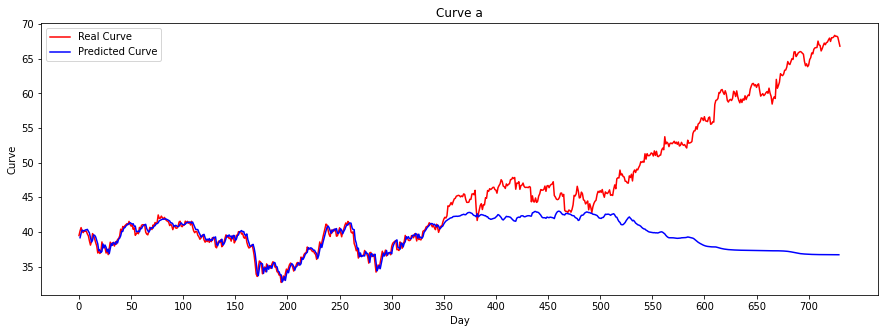

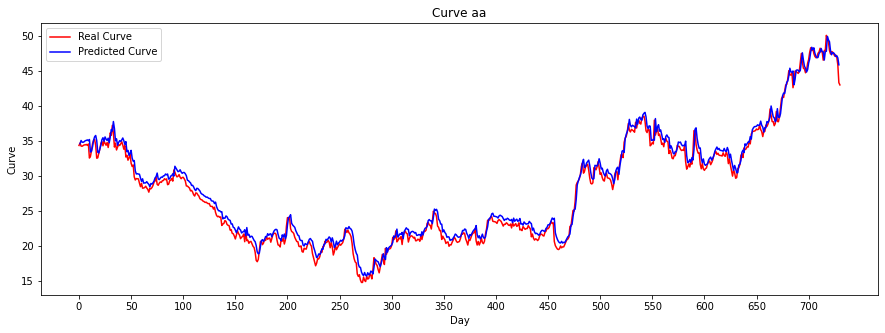

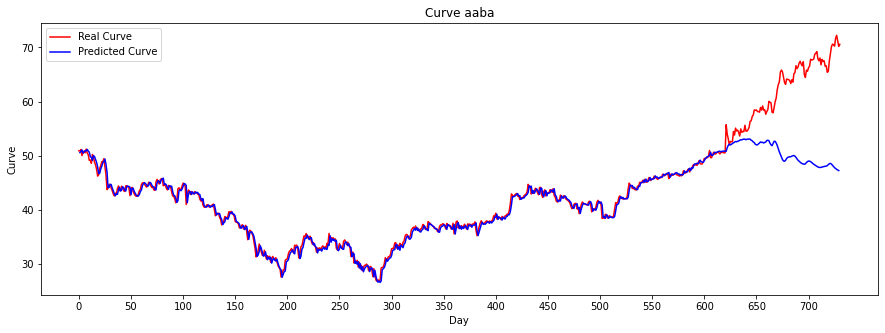

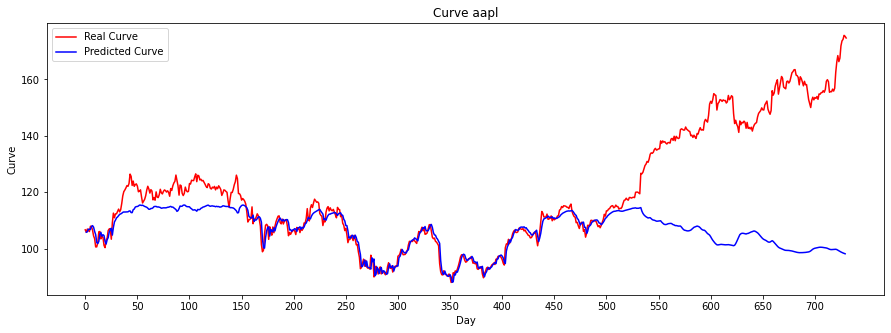

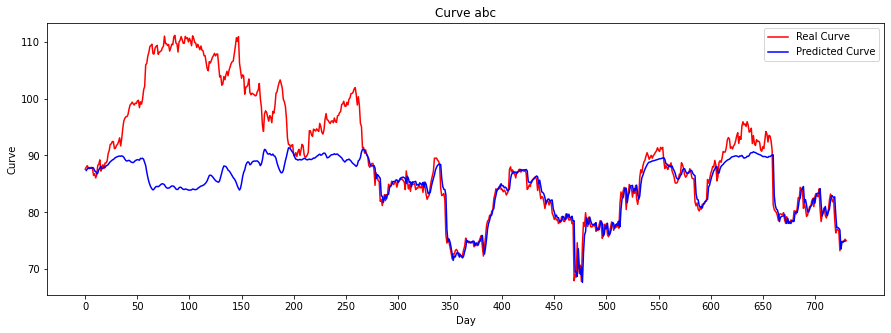

In [ ]:
# Visualising the results
for i in range(0, n):
  plt.figure(figsize=(15, 5))
  test = list(df.iloc[i, train_size:].values)
  plt.plot([x for x in range(0, test_size+1)], test, color = "red", label = "Real Curve")
  plt.plot([x for x in range(1, test_size)],  predicted[i], color = "blue", label = "Predicted Curve")
  plt.xticks(np.arange(0, test_size, 50))
  plt.title('Curve ' + df.iloc[i, 0])
  plt.xlabel('Day')
  plt.ylabel('Curve')
  plt.legend()
  plt.show()